In [1]:
%%time
# Read the data and specify the feature columns
# The data has to contain the 'Label' column.

from pycolator import *

path = '../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv'

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess(path, idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
Wall time: 16 s


Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3695, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3880, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 4301, length of negative training set: 28396
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 288.79.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 4524, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4699, length of negative training set: 28394
Optimal parameters are C=10 and clas

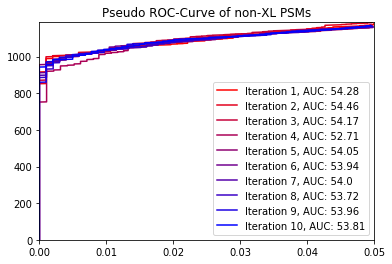

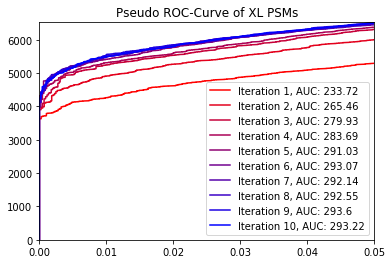

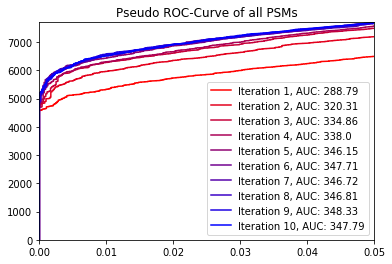

Wall time: 2min 35s


In [2]:
%%time 
# Run the pycolator algorithm

# Where to save the generated pseudo ROC curves
saveName = ''

# The columns name that determines a PSMs class affiliation
# currently, only 2 classes are supported, indicated with 0 or 1

# If not set, class proportions will not be maintained, imputation is not possible
# and only one pseudoROC, for the whole dataset, is plotted
classCol = 'NuXL:isXL'

# This list is necessary for plots of different classes
classNames = ['non-XL', 'XL']

p = pycolator(dSlow, idCol, features, plotSaveName = saveName, classCol = classCol, classNames = classNames)

In [3]:
idents = len(p.loc[(p['q-val'] <= 0.01) & (p[classCol] == 1)])
print('{} cross-linked PSMs were identified at 1% q-value.'.format(idents))

5570 cross-linked PSMs were identified at 1% q-value.
